<font color="white">.</font> | <font color="white">.</font> | <font color="white">.</font>
-- | -- | --
![NASA](http://www.nasa.gov/sites/all/themes/custom/nasatwo/images/nasa-logo.svg) | <h1><font size="+3">ASTG Python Courses</font></h1> | ![NASA](https://www.nccs.nasa.gov/sites/default/files/NCCS_Logo_0.png)

---

<center><h1><font color="red" size="+3">Cartopy and Xarray for Data Visualization</font></h1></center>

## Reference Documents

* <A HREF="https://scitools.org.uk/cartopy/docs/latest/">Introduction --- Cartopy</A>
* <A HREF="https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html">Maps with Cartopy</A>
* <A HREF="https://geohackweek.github.io/visualization/03-cartopy/">Basics: Quick + Simple maps with cartopy.</A>
* <A HREF="https://uoftcoders.github.io/studyGroup/lessons/python/cartography/lesson/">Cartography and Mapping in Python</A>
* <A HREF="https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/">Introduction to Vector Format Spatial Data - Points, Lines and Polygons</A>
- [Visualizing Global Land Temperatures in Python with scrapy, xarray, and cartopy](https://cbrownley.wordpress.com/tag/xarray/)

_______

## Required Packages

```
   Matplotlib
   Numpy
   netCDF4
   Cartopy
   hvplot (conda install -c pyviz hvplot)
   Xarray
```

### <font color='blue'> Only run the following cell if you are on Google Colab</font>

Uncomment the cell below if you are on Google Colab

In [ ]:
#!apt-get install libproj-dev proj-data proj-bin
#!apt-get install libgeos-dev
#!pip install cython
#!pip install cartopy
#!pip install netCDF4
#!pip install xarray==0.16.2

***

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mticker

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [4]:
import netCDF4 as nc4
import numpy as np
import xarray as xr
import hvplot.xarray

In [5]:
print(f"Version of Numpy:   {np.__version__}")
print(f"Version of netCDF4: {nc4.__version__}")
print(f"Version of Xarray:  {xr.__version__}")
print(f"Version of Cartopy: {cartopy.__version__}")

Version of Numpy:   1.23.2
Version of netCDF4: 1.5.8
Version of Xarray:  0.19.0
Version of Cartopy: 0.18.0


# <font color='red'>Cartopy</font>

### What is Cartopy?

* Package for drawing maps for for data analysis and visualization
* Relies on PROJ.4, numpy and shapely libraries
* Built on top of Matplotlib 
* Has a simple and intuitive drawing interface to Matplotlib

### What Does Cartopy Provide?

* Facilities to transform coordinates to different <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections">map projections</a>
* Matplotlib is used to plot contours, images, vectors, lines or points in the transformed coordinates.
* Shorelines, river and political boundary datasets.
* Facilities for reading shapefiles.


## <font color="blue">Drawing Maps</font>

To draw maps, we need to have:

- A map projection of geographic coordinates on the 3D Earth to the 2D space of your figure.
- A set of decorations (for instance, rivers, lakes, country borders, continents, etc.)

### Map Projections

- In Cartopy, each projection is a class. 
- One of the key features of Cartopy is its ability to transform points, lines, vectors, polygons and images between projections
- Cartopy depends on Matplotlib, and each projection knows how to create a Matplotlib Axes (or `AxesSubplot`) that can represent itself.
- The Axes that the projection creates is a `cartopy.mpl.geoaxes.GeoAxes`. This Axes subclass overrides some of Matplotlib’s existing methods, and adds a number of extremely useful ones for drawing maps.

```python
# Option 1
   plt.figure()
   ax = plt.axes(projection=ccrs.PlateCarree())

# Option 2
   fig, ax = plt.subplots(
       subplot_kw={'projection': ccrs.PlateCarree()}
   )
```

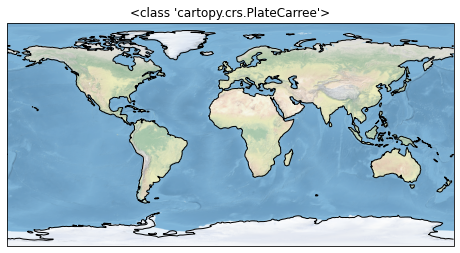

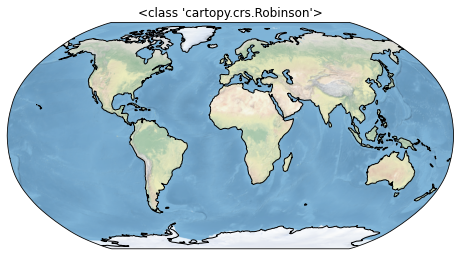

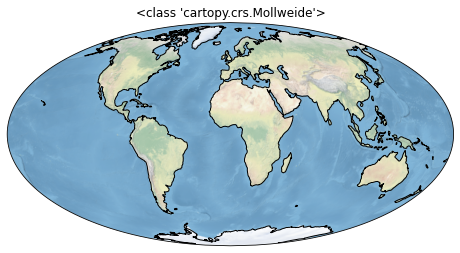

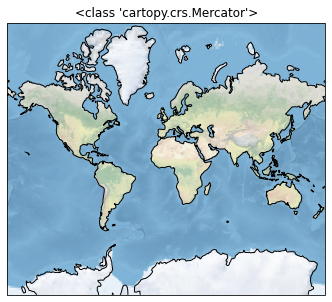

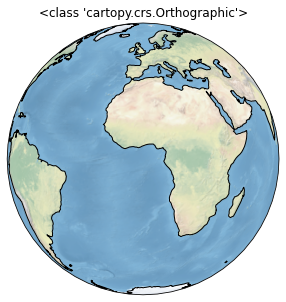

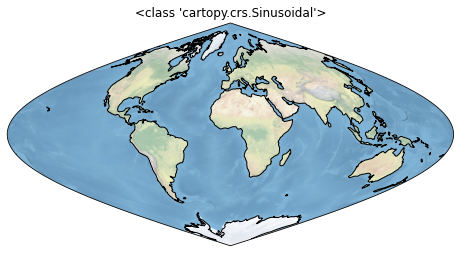

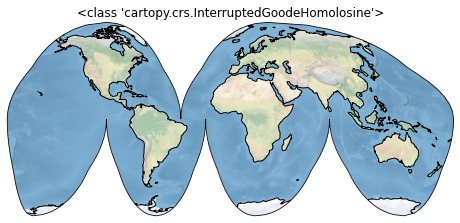

In [6]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mollweide(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.Sinusoidal(),
               ccrs.InterruptedGoodeHomolosine()
              ]


for proj in projections:
    plt.figure(figsize=(8,5))
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')
    plt.show()

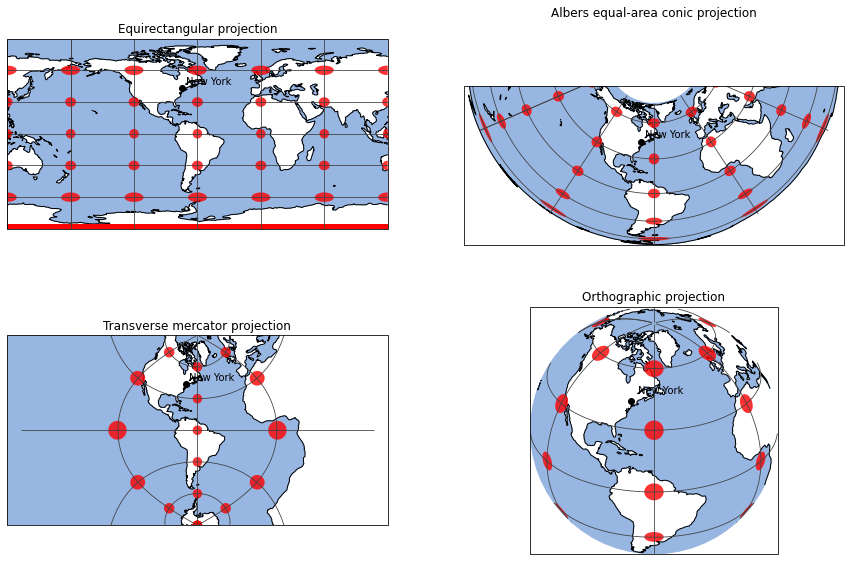

In [7]:
from cartopy.feature import OCEAN

projections = [ccrs.PlateCarree(-60), 
               ccrs.AlbersEqualArea(-60), 
               ccrs.TransverseMercator(-60), 
               ccrs.Orthographic(-60, 30)]

titles = ['Equirectangular projection', 
          'Albers equal-area conic projection', 
          'Transverse mercator projection', 
          'Orthographic projection']

fig, axes = plt.subplots(2, 2, 
                         subplot_kw={'projection': projections[2]}, 
                         figsize=(15,10))

ny_lon, ny_lat = -75, 43

for ax, proj, title in zip(axes.ravel(), projections, titles):
    # Change projection for each subplot
    ax.projection = proj
    # Add title for each subplot.
    ax.set_title(title)  
    # Set global extention
    ax.set_global()         
    # Add coastlines
    ax.coastlines()    
    # Add oceans
    ax.add_feature(OCEAN)   
    # Add tissot indicatrisses
    ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 30))         # Add tissot indicatrisses
    ax.plot(ny_lon, ny_lat, 'ko', transform=ccrs.Geodetic())               # Plot the point for the NY city
    ax.text(ny_lon + 4, ny_lat + 4, 'New York', transform=ccrs.Geodetic()) # Label New York
    ax.gridlines(color='.25', ylocs=np.arange(-90,90, 30))                 # Ad gridlines
plt.show()

### Features

- To give our map more styles and details, we add `cartopy.feature` objects.
- Many useful features are built in. These "default features" are at coarse (`110m`) resolution.

```python
cfeature.BORDERS   # Country boundaries
cfeature.COASTLINE # Coastline, including major islands
cfeature.LAKES     # Natural and artificial lakes
cfeature.LAND      # Land polygons, including major islands
cfeature.OCEAN     # Ocean polygons
cfeature.RIVERS    # Single-line drainages, including lake centerlines
cfeature.STATES    # limited to the United States at this scale
```

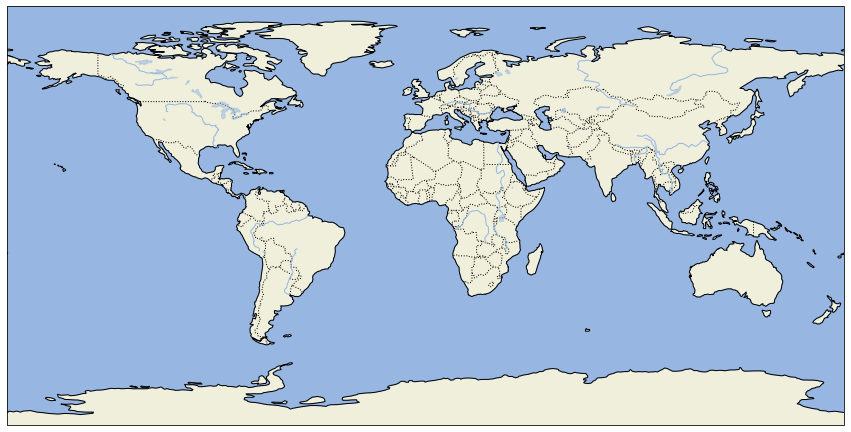

In [8]:
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(15,10))
ax.add_feature(cartopy.feature.LAND)

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

#### We can use the [Natural Earth](https://www.naturalearthdata.com/) datasets to change the [resolution of the features](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html#cartopy.feature.NaturalEarthFeature).

- The features with names such as `cfeature.LAND`, `cfeature.OCEAN`, are on 110m resolution shapefiles from the NaturalEarth repository.  
- Higher resolution shapefiles (10m, 50m) can be used by using the `cfeature.NaturalEarthFeature` method as illustrated below.

In [9]:
scale = '50m'  # use data at this scale

boundary = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_0_boundary_lines_land',
    scale=scale, facecolor='none', alpha=0.7,
)
country_borders = cfeature.NaturalEarthFeature(
    'physical', 'borders',
    scale=scale, edgecolor='black', facecolor='none',
)
coastline_mask = cfeature.NaturalEarthFeature(
    'physical', 'coastline',
    scale=scale, edgecolor='black', facecolor='none',
)
land_mask = cfeature.NaturalEarthFeature(
    'physical', 'land',
    scale=scale, edgecolor='k',
    facecolor=cfeature.COLORS['land'],
)
sea_mask = cfeature.NaturalEarthFeature(
    'physical', 'ocean', 
    scale=scale, edgecolor='none',
    facecolor=cfeature.COLORS['water'],
)
lake_mask = cfeature.NaturalEarthFeature(
    'physical', 'lakes', 
    scale=scale, edgecolor='b',
    facecolor=cfeature.COLORS['water'],
)
river_mask = cfeature.NaturalEarthFeature(
    'physical', 'rivers_lake_centerlines', 
    scale=scale, edgecolor='b', facecolor='none'
)
usa_state_borders = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale=scale, facecolor='none', edgecolor='k')

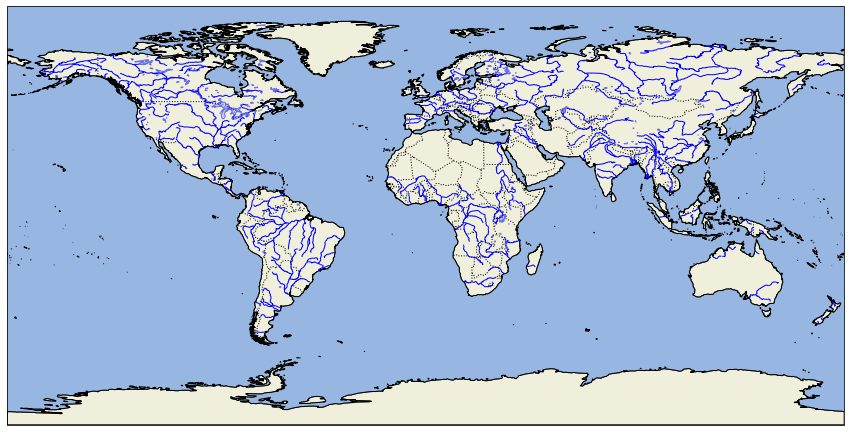

In [10]:
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(15,10))
ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(coastline_mask)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(lake_mask, alpha=0.5)
ax.add_feature(river_mask);

#### Create a Regional Map
- Use the `set_extent` method to select the subdomain you want to map.


```python
  ax.set_extent([min_lon, max_lon, min_lat, max_lat])
```


<font color="blue"> Map of the United States of America </font>

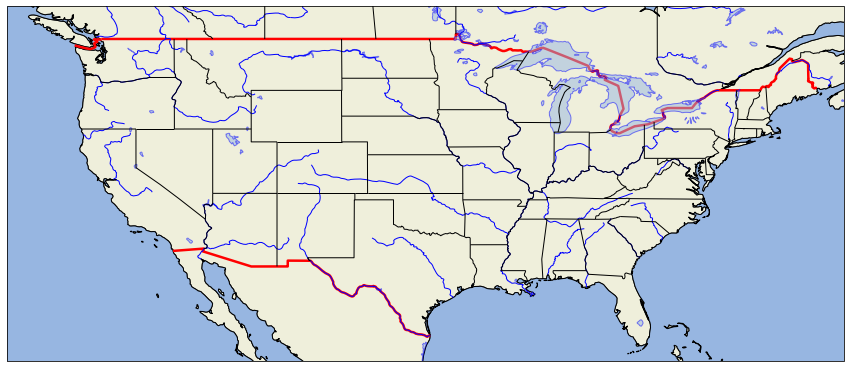

In [11]:
min_lon, max_lon, min_lat, max_lat = -130, -65, 24, 47
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(15,10))
ax.add_feature(land_mask)
ax.add_feature(sea_mask)
ax.add_feature(coastline_mask)
ax.add_feature(cfeature.BORDERS, edgecolor='red', linewidth=2.5)
ax.add_feature(lake_mask, alpha=0.5)
ax.add_feature(river_mask)
ax.add_feature(usa_state_borders)
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

## <font color="green"> Application</font>

Given a city name and location (latitude and longitude), we want to plot on the map:

- The city location and its name
- The current local time 

In [12]:
#!pip install timezonefinder

In [ ]:
import datetime
import pytz
import timezonefinder

def get_local_time(latitude, longitude):
    """
      Given the latitude/longitude pair, this function
      returns the current local time at the location.
    """
    tf = timezonefinder.TimezoneFinder()

    # Get the tz-database-style time zone name
    # (e.g. 'America/Vancouver') or None
    timezone_str = tf.certain_timezone_at(lat=latitude, lng=longitude)

    if timezone_str:
       # Display the current time in that time zone
       timezone = pytz.timezone(timezone_str)
       dt = datetime.datetime.utcnow()
       return (dt + timezone.utcoffset(dt)).strftime('%H:%M:%S')
    else:
       # Could not determine the time zone
       return

In [ ]:
paris = (2.35, 48.85, "Paris")
new_york = (-73.92, 40.69, "New York")
mumbai = (72.83, 28.35, "Mumbai")
tokyo = (139.69, 35.68, "Tokyo")
moscow = (37.36, 55.45, "Moscow")
mexico_city = (-99.13, 19.43, "Mexico City")
sao_paulo = (-46.63, -23.55, "Sao Paulo")
yaounde = (11.50, 3.84, "Yaounde")
vancouver = (-123.08, 49.32, "Vacouver")
sydney = (151.20, -33.87, "Sydney")
harare = (31.0, -18.0, "Harare")

cities = [paris, new_york, mumbai, tokyo, moscow, mexico_city,
         sao_paulo, yaounde, vancouver, sydney, harare]

In [ ]:
city_names = [city[2] for city in cities]
city_lats    = [city[1] for city in cities]
city_lons   = [city[0] for city in cities]

In [ ]:
plt.figure(figsize=(17, 10))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

props = dict(boxstyle='round', facecolor='orange', alpha=0.5)

for i in range(len(city_names)):
    loc_time = get_local_time(city_lats[i], city_lons[i])
    textstr = "\n".join((city_names[i], loc_time))
    plt.text(city_lons[i], city_lats[i], textstr, bbox=props,
             transform=ccrs.Geodetic())

plt.show()

## <font color='blue'>Overlaying Data</font>

#### Line Plots on a Map

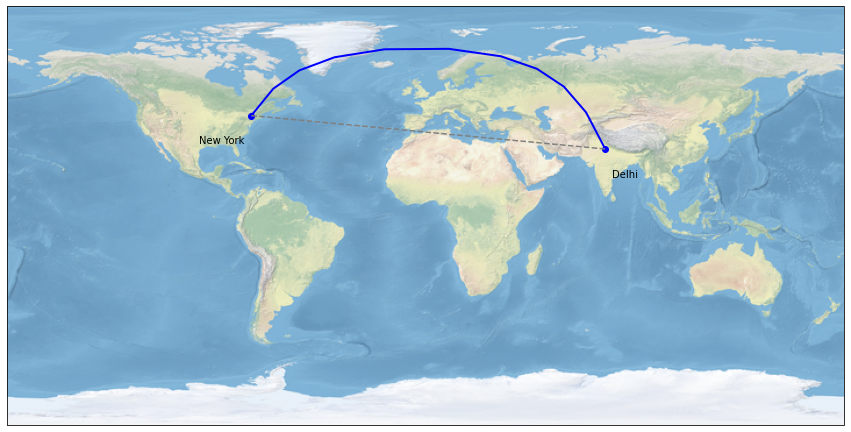

In [13]:
map_projection = ccrs.PlateCarree()
data_transform1 = ccrs.PlateCarree()
data_transform2 = ccrs.Geodetic()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=data_transform2)

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=data_transform1)

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=data_transform2)

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=data_transform2)

plt.show()

#### <font color="red">Understanding Projection and Transform Keywords</font>
+ The projection of your axes is independent of the coordinate system your data is defined in.
+ The `projection` argument is used when creating plots and determines the projection of the resulting plot.
+ You can set `projection` to any projection you like.
+ The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in. 
+ `transform` needs to match whatever coordinate system your data uses.

### Basic Map

- We create synthetic geo-located data and plot them using Cartopy.

In [14]:
nlats, nlons = 73, 145
lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
lons = np.linspace(0, 2 * np.pi, nlons)

# Create a mesh grid
lons, lats = np.meshgrid(lons, lats)
wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

lats = np.rad2deg(lats)
lons = np.rad2deg(lons)
data = wave + mean

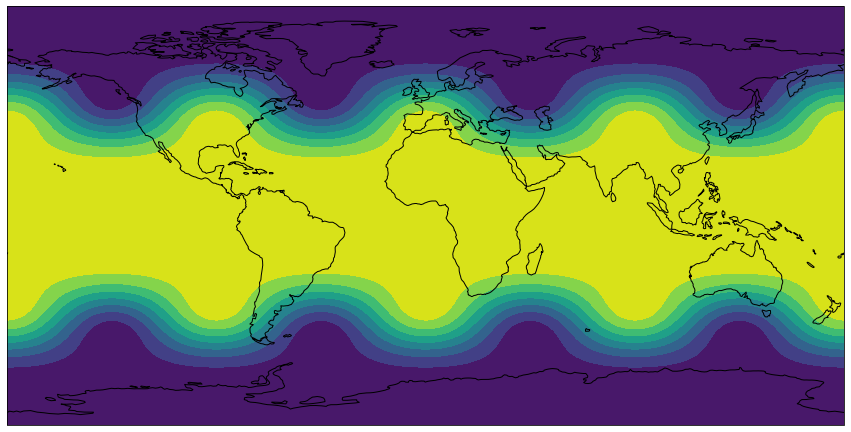

In [15]:
map_projection = ccrs.PlateCarree()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

ax.contourf(lons, lats, data)
ax.coastlines()
ax.set_global()
plt.show()

#### Adding Latitude/Longitude Ticks

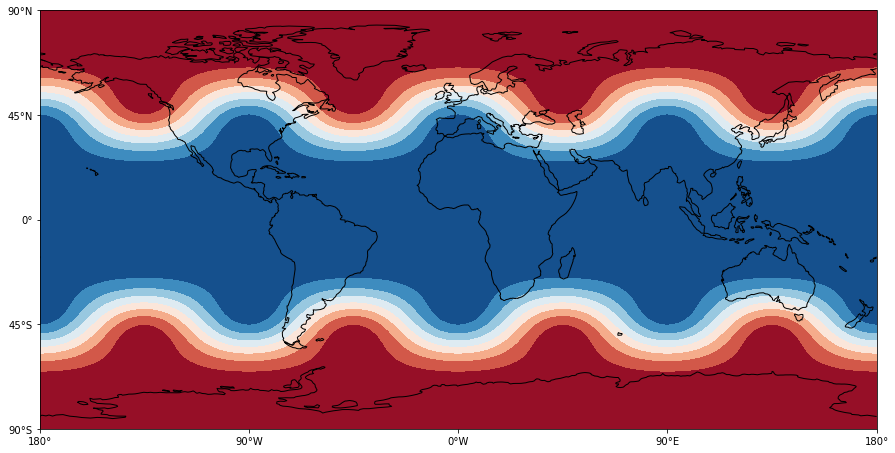

In [16]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

map_projection = ccrs.PlateCarree()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

ax.contourf(lons, lats, data, cmap='RdBu')
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_global()
plt.show()

#### Adding Colorbar

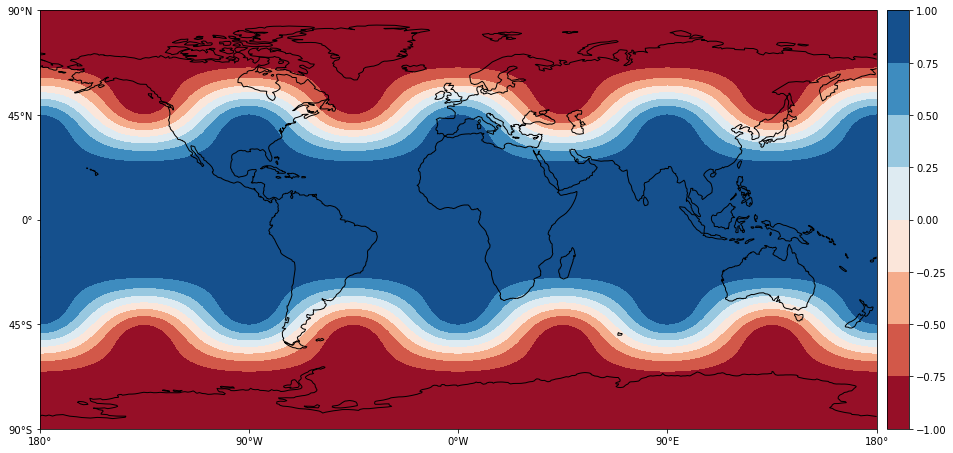

In [17]:
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

im = ax.contourf(lons, lats, data, cmap='RdBu', transform=data_transform)
ax.coastlines()

ax.set_xticks(np.linspace(-180, 180, 5), crs=map_projection)
ax.set_yticks(np.linspace(-90, 90, 5), crs=map_projection)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Create an axes for colorbar. 
# The position of the axes is calculated based on the position of ax.
# You can change dspace to adjust the distance between the main image and the colorbar.
# You can change dwidth to adjust the width of the colorbar.
# This practice is universal for both subplots and GeoAxes.
dspace = 0.01
dwidth = 0.02
cax = fig.add_axes([ax.get_position().x1 + dspace,
                    ax.get_position().y0,  dwidth,
                    ax.get_position().height])
plt.colorbar(im, cax=cax)


ax.set_global()
plt.show()

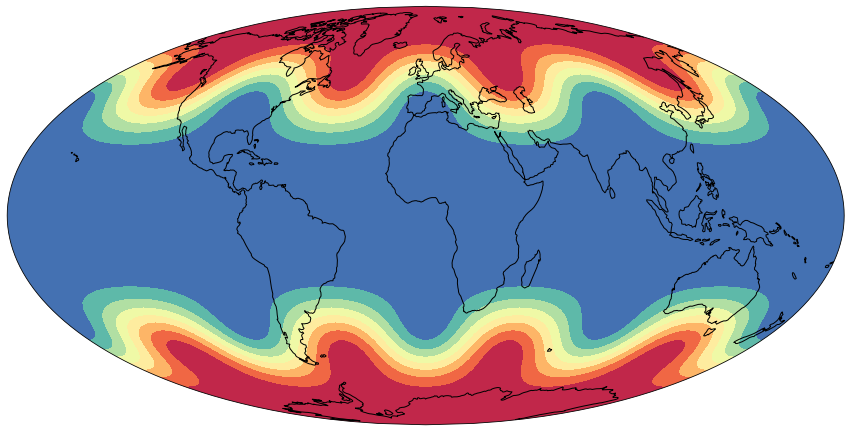

In [18]:
map_projection = ccrs.Mollweide()
data_transform = ccrs.PlateCarree()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

ax.contourf(
    lons, lats, data, 
    transform=ccrs.PlateCarree(), 
    cmap='Spectral')
ax.coastlines()
ax.set_global()
plt.show()

# <font color='red'>Xarray</font>

+ `Xarray` is an open source project and Python package that makes working with **labelled multi-dimensional arrays** simple and efficient.
+ Introduces labels in the form of dimensions, coordinates and attributes on top of raw `NumPy`-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. 
+ Is inspired by and borrows heavily from `Pandas`.
+ Builds on top of, and seamlessly interoperates with, the core scientific Python packages, such as NumPy, SciPy, Matplotlib, and Pandas
+ Is particularly tailored to working with `netCDF` files and integrates tightly with `Dask` for parallel computing.

**Here, we will read datasets with Xarray and will do various plots with Xarray and Cartopy.**

### Reading GEOS-5 MERRA2 Time Series Dataset

In [19]:
%env HDF5_USE_FILE_LOCKING=FALSE

env: HDF5_USE_FILE_LOCKING=FALSE


In [20]:
xr.set_options(file_cache_maxsize=10)

In [21]:
URL ='https://opendap.nccs.nasa.gov/dods/GEOS-5/fp/0.25_deg/assim/tavg3_3d_asm_Nv'
geos5_xrs = xr.open_dataset(URL, engine='netcdf4')
geos5_xrs

<xarray.Dataset>
Dimensions:  (time: 14665, lev: 72, lat: 721, lon: 1152)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-01T01:30:00 ... 2022-12-08T01:30:00
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 68.0 69.0 70.0 71.0 72.0
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 -180.0 -179.7 -179.4 -179.1 ... 179.1 179.4 179.7
Data variables: (12/16)
    qv       (time, lev, lat, lon) float32 ...
    v        (time, lev, lat, lon) float32 ...
    u        (time, lev, lat, lon) float32 ...
    h        (time, lev, lat, lon) float32 ...
    o3       (time, lev, lat, lon) float32 ...
    omega    (time, lev, lat, lon) float32 ...
    ...       ...
    ql       (time, lev, lat, lon) float32 ...
    ps       (time, lat, lon) float32 ...
    qi       (time, lev, lat, lon) float32 ...
    slp      (time, lat, lon) float32 ...
    taitime  (time, lat, lon) float32 ...
    epv      (time, lev, lat, lon) float32 ...
Attributes:
    title:                GEOS5.10.0 FP 3d time-averaged assimilated state on...
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Thu Dec 08 05:33:10 EST 2022 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [22]:
print(f"Starting Time: \n\t {geos5_xrs.time.values[0]}")
print(f"Ending Time:   \n\t {geos5_xrs.time.values[-1]}")

Starting Time: 
	 2017-12-01T01:30:00.000000000
Ending Time:   
	 2022-12-08T01:30:00.000000000


In [23]:
print(f"Time resolution: {geos5_xrs.time.attrs['resolution']} day")

Time resolution: 0.125 day


### Extracting Surface Pressure Data over the US

We only consider data betwen December 10, 2021 at 12:30z to December 11, 2021 at 12:30z

In [24]:
min_lon, max_lon, min_lat, max_lat = -130, -65, 24, 47

ps = geos5_xrs.ps.sel(
    lat=slice(min_lat, max_lat), 
    lon=slice(min_lon, max_lon), 
    time=slice("2021-12-10T12:30:00", "2021-12-11T12:30:00")
)
ps

<xarray.DataArray 'ps' (time: 8, lat: 93, lon: 209)>
[155496 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-12-10T13:30:00 ... 2021-12-11T10:30:00
  * lat      (lat) float64 24.0 24.25 24.5 24.75 25.0 ... 46.25 46.5 46.75 47.0
  * lon      (lon) float64 -130.0 -129.7 -129.4 -129.1 ... -65.62 -65.31 -65.0
Attributes:
    long_name:  surface_pressure

### Contour plots at each time record

#### Xarray Formulation 1

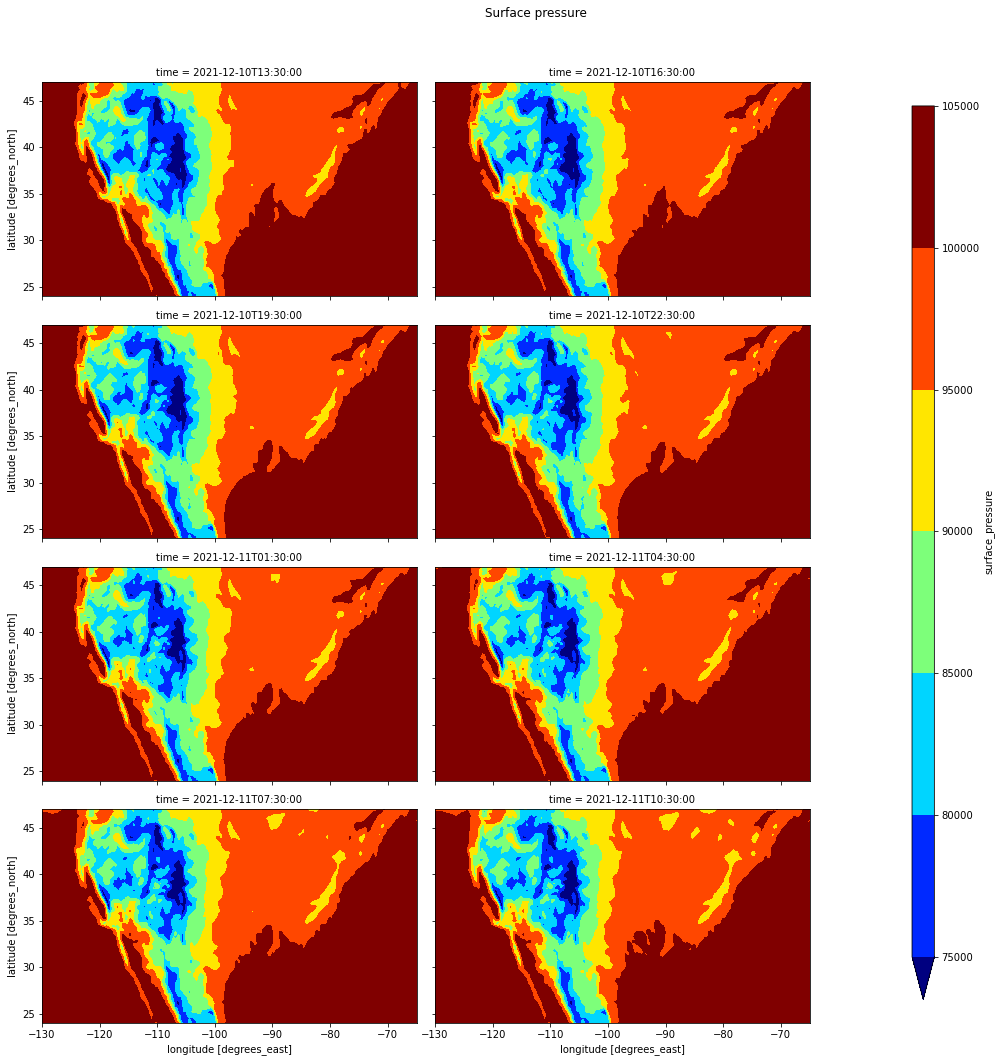

In [25]:
ps.plot.contourf(
    x="lon", 
    y="lat", 
    col="time", 
    col_wrap=2,
    cmap='jet',
    figsize=(15, 14), 
    robust=True,
    cbar_kwargs={
        "orientation": "vertical",
        "shrink": 0.95,
        "aspect": 40,
        "pad": 0.1,
    },
)
plt.suptitle("Surface pressure", y = 1.05);

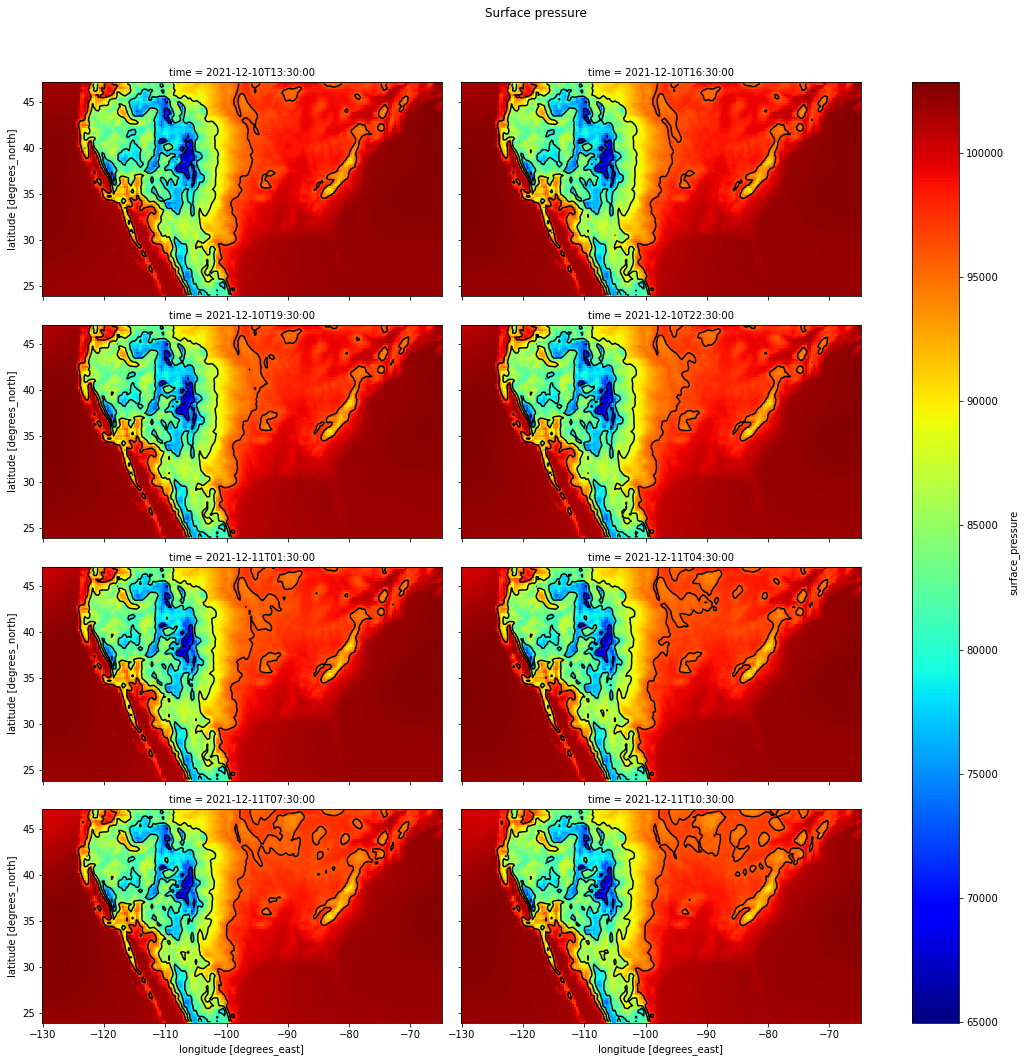

In [26]:
fg = ps.plot(col="time", col_wrap=2, 
             cmap='jet', figsize=(15, 14))

# Use this to plot contours on each panel
# Note that this plotting call uses the original DataArray gradients
fg.map_dataarray(
    xr.plot.contour, x="lon", y="lat", colors="k", 
    levels=6, add_colorbar=False
)
plt.suptitle("Surface pressure", y = 1.05);

#### Xarray Formulation 2

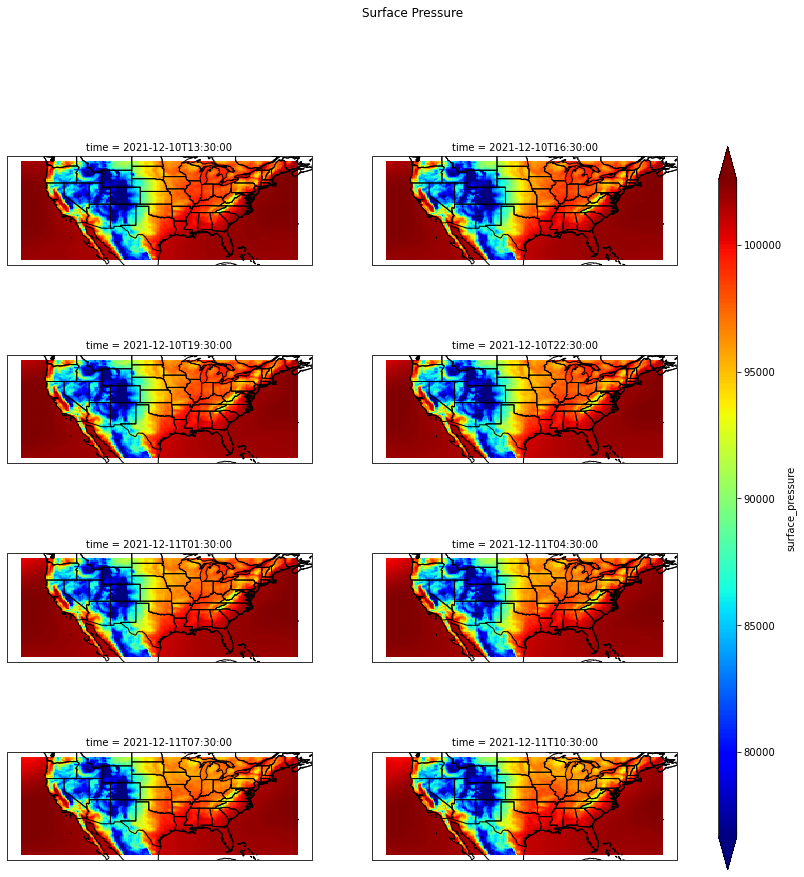

In [27]:
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

aspect = ps.shape[2] / ps.shape[1]

p = ps.plot(
    transform=data_transform,  # the data's projection
    col='time', col_wrap=2,
    aspect=aspect,
    figsize=(15, 14),
    cmap='jet',
    cbar_kwargs={"orientation": "vertical", "shrink": 0.95, "aspect": 40},
    robust = True,
    subplot_kws={'projection': map_projection}
)

for ax in p.axes.flat:
    ax.coastlines()
    ax.add_feature(cfeature.STATES)
    #ax.set_extent(extent)

plt.suptitle("Surface Pressure", y = 1.0);

#### Cartopy Formulation

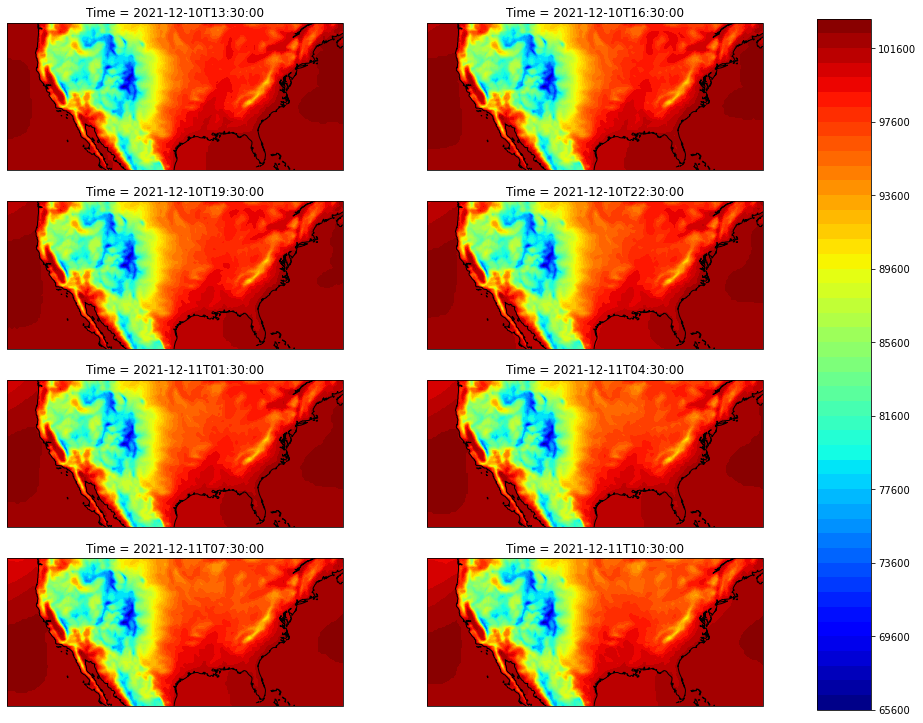

In [28]:
map_projection = ccrs.Mercator()
data_transform = ccrs.PlateCarree()

plt.rcParams["figure.figsize"] = [15, 12]
fig = plt.figure(tight_layout=False)
nrows, ncols = 4, 2

for i in range(8):
    ax = fig.add_subplot(nrows, ncols, i+1, projection=map_projection)
    data = ps[i].values
    if i == 0:
        lats = ps[i]['lat'].values
        lons = ps[i]['lon'].values

    cp = plt.contourf(lons, lats, data, 60,
                      cmap='jet', transform=data_transform)
    ax.coastlines()
    title = f'Time = {str(ps[i].time.values)[0:19]}'
    ax.set_title(title)

# add a subplot for vertical colorbar
bottom, top = 0.1, 0.9
left, right = 0.1, 0.8
fig.subplots_adjust(top=top, bottom=bottom, 
                    left=left, right=right, hspace=0.15, wspace=0.25)
cbar_ax = fig.add_axes([0.85, bottom, 0.05, top-bottom])
fig.colorbar(cp, cax=cbar_ax);  # plot colorbar

### Time Average Contour Plot

In [29]:
ps_mean = ps.mean(dim='time')

#### Using Xarray

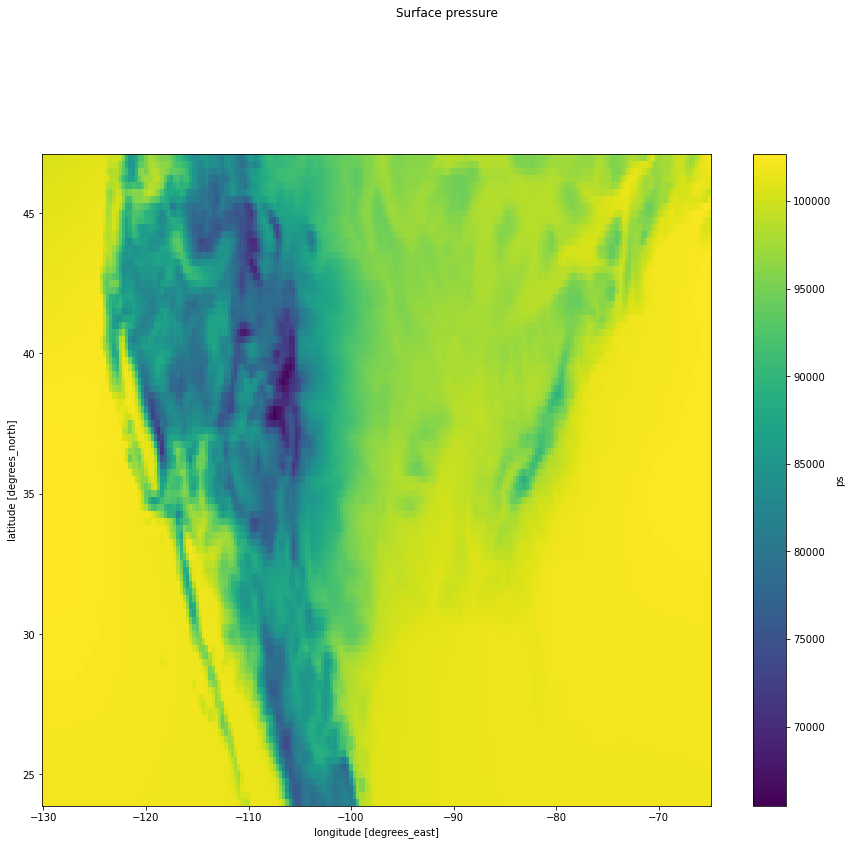

In [30]:
ps_mean.plot(x="lon", y="lat")
plt.suptitle("Surface pressure", y = 1.05);

#### Using Xarray and Cartopy Projections

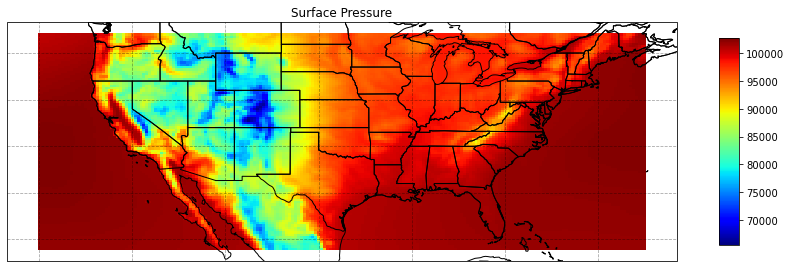

In [31]:
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

plt.figure(figsize=(15,10))

p = ps_mean.plot(
    x='lon', y='lat',
    transform=data_transform,  
    subplot_kws={'projection': map_projection},
    cmap='jet',       
    add_labels=False,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.38, "aspect": 10}
)

ax = p.axes
ax.coastlines()
ax.add_feature(cfeature.STATES)

# optional add grid lines
p.axes.gridlines(color='black', alpha=0.35, linestyle='--')

plt.title("Surface Pressure");

Add latitude/longitude labels:

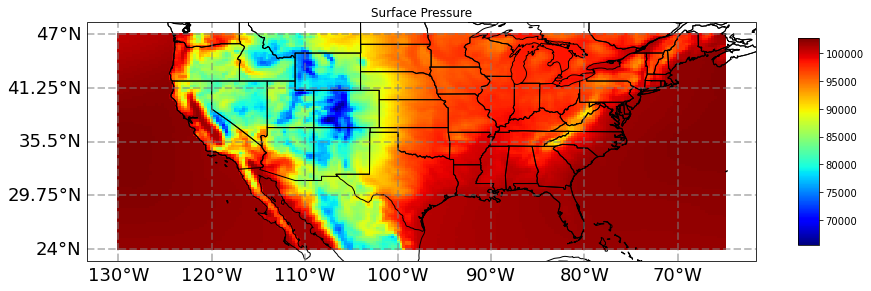

In [32]:
map_projection = ccrs.PlateCarree()
data_transform = ccrs.PlateCarree()

plt.figure(figsize=(15,10))

p = ps_mean.plot(
    x='lon', y='lat',
    transform=data_transform,  
    subplot_kws={'projection': map_projection},
    cmap='jet',       
    add_labels=False,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.38, "aspect": 10})

ax = p.axes
ax.coastlines()
ax.add_feature(cfeature.STATES)

# draw parallels/meridiens and write labels
gl = p.axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')

# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator(np.linspace(min_lat,max_lat,5))
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}

plt.title("Surface Pressure");

#### Using Cartopy

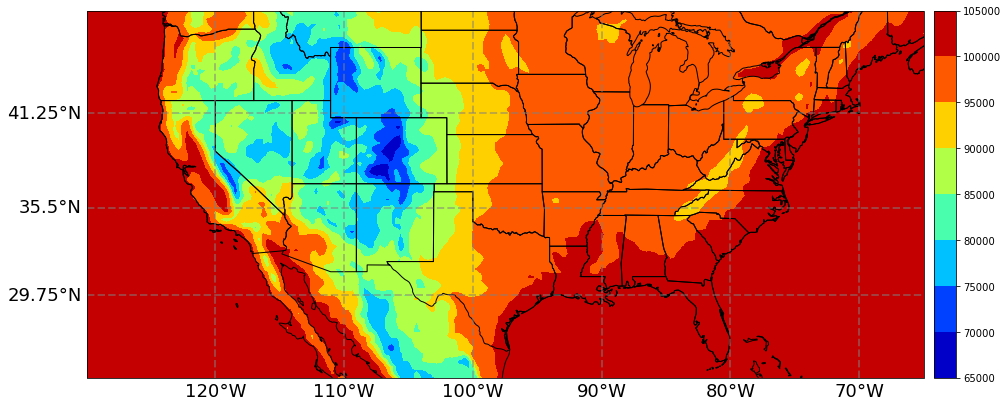

In [33]:
map_projection = ccrs.Mercator()
data_transform = ccrs.PlateCarree()

fig, ax = plt.subplots(
    subplot_kw={'projection': map_projection},
    figsize=(15,10))

data = ps_mean.values
lats = ps_mean['lat'].values
lons = ps_mean['lon'].values
    
p = ax.contourf(lons, lats, data, \
            transform=ccrs.PlateCarree(), \
            cmap='jet')
ax.add_feature(coastline_mask)
ax.add_feature(cfeature.STATES)

# optional add grid lines
#ax.gridlines(color='black', alpha=0.25, linestyle='--')

# Add colorbar
dspace = 0.01
dwidth = 0.02
cax = fig.add_axes([ax.get_position().x1 + dspace,
                    ax.get_position().y0,  dwidth,
                    ax.get_position().height])

# draw parallels/meridiens and write labels
gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=2, color='gray', alpha=0.5, 
    linestyle='--'
)

# adjust labels to taste
gl.xlabels_top = False
gl.ylabels_right = False
gl.ylocator = mticker.FixedLocator(np.linspace(min_lat,max_lat,5))
gl.xformatter = LongitudeFormatter() 
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 18, 'color': 'black'}
gl.ylabel_style = {'size': 18, 'color': 'black'}

plt.colorbar(p, cax=cax);

## <font color="red">Interactive Plots with `hvplot`</font>

- `hvplot` allows easy interactive visualization (based on `Bokeh`) of Xarray objects.
- `hvplot` makes uses of xarray’s accessor interface. 
    - All Xarray gain a `.hvplot` attribute that lets you access `hvplo`t functionality as easily as you would use `.plot`.
    
We need to use the import statement:
```python
   import hvplot.xarray
```

#### ``hvplot`` makes the same default choices as Xarray

If the data has more than two dimensions it will default to a histogram without providing it further hints:

In [34]:
ps.hvplot()

:NdOverlay   [Element]
   :Histogram   [ps]   (ps_count)

Line plot:

In [35]:
ps.isel(time=2, lon=1).hvplot()

:Curve   [lat]   (ps)

We can apply a `groupby` along a particular dimension to allow us to explore the data along that dimension with a slider:

In [36]:
ps.isel(lon=1).hvplot(groupby="time", width=400)

:DynamicMap   [time]
   :Curve   [lat]   (ps)

In [37]:
ps.hvplot.line(x='time', width=400)

:DynamicMap   [lon,lat]
   :Curve   [time]   (ps)

We can view the data as an image:

In [38]:
ps.isel(time=2).hvplot(cmap="jet")

:Image   [lon,lat]   (ps)

We can plot the data using `contour` and `contourf` methods:

In [39]:
ps.isel(time=2).hvplot.contour(cmap="jet")

:Contours   [lon,lat]   (ps)

In [40]:
ps.isel(time=2).hvplot.contour(cmap="jet", width=500)+ps.isel(time=2).hvplot.contourf(cmap="jet", width=500)

:Layout
   .Contours.I :Contours   [lon,lat]   (ps)
   .Polygons.I :Polygons   [lon,lat]   (ps)

#### Animations

- We give all the data and ask `hvplot` to create a nice slider to control the time slice using the `groupby` keyword argument.

In [41]:
ps.hvplot(
    groupby="time",
    cmap='jet',
)

:DynamicMap   [time]
   :Image   [lon,lat]   (ps)

We can add widgets by providing the `widget_type` and `widget_location` keywords arguments.

In [42]:
ps.hvplot(
    groupby="time", 
    cmap='jet', 
    widget_type="scrubber",
    widget_location="bottom",
)

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=7, width=550)
        [2] HSpacer()

#### Statistical Plots

We can a KDE plot to summarize all the surface pressure at selected latitudes:

In [43]:
ps.sel(lat=[25, 38, 45]).hvplot.kde('ps', by='lat', alpha=0.5)

:NdOverlay   [lat]
   :Distribution   [ps]   (Density)

We can break down the distribution of the surface pressure across one or more variables:

In [44]:
lat_vals = [24, 25.5, 26.75, 27, 30.5, 40, 45.75, ]
ps.sel(lat=lat_vals).hvplot.violin('ps', by='lat', color='lat', cmap='Category20')

:Violin   [lat]   (ps)